# Standard Linear Regression: The Market Model

---


An asset's Market Model (MM) is a standard time series regression of the the realized excess returns of the asset against the realized excess returns of the market. Excess returns are defined as returns in excess of some benchmark such as the risk-free rate. A security's MM is formulated as:


**(R - F) = 𝛂 + 𝛃 (M - F) + 𝛔**

Y = (R - F) is the outcome variable,  X = (M - F) is the predictor variable, R is the realized return of a stock, F is the return on a risk-free asset (US treasury bill) , M is the realized return of a market portfolio (S&P 500), 𝛼 (alpha) is the expected stock-specific return, 𝛽 (beta) is the level of systematic risk exposure to the market, 𝛔 (sigma) is the unexpected stock-specific return



Note that an asset's MM is different from its Captial Asset Pricing Model (CAPM). Unlike the CAPM, an asset's MM has both an idiosyncratic risk term 𝛼 and an error term 𝛔 in its formulation. However, the systematic risk term beta of the asset is the same as the one calculated using the CAPM. The expected value of 𝛔 is zero. That is the reason it does not appear in the CAPM which formulates expected returns.

According to the CAPM which subscribes to the efficient market hypothesis, the intercept, or 𝛼, of an asset's MM has an expected value of zero. The asset's realized postive/(negative) 𝛼 shows that the market participants under priced/(overpiced) the security during the holding period.


# Import your data

We use the following free data sources to get the daily closing prices of various assets:

Risk free rate: https://fred.stlouisfed.org/series/TB4WK

Stock and market data: https://finance.yahoo.com

In [0]:
import statsmodels.api as sm
import pandas_datareader.data as pdr
import fix_yahoo_finance as yf
yf.pdr_override()
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from datetime import datetime



start = datetime(2017, 10, 20)
end = datetime(2019, 10, 21)

riskfree_rate = pdr.DataReader('TB4WK', 'fred', start, end)
market = pdr.get_data_yahoo('SPY', start, end)
stock = pdr.get_data_yahoo('AAPL', start, end)

# Explore your data

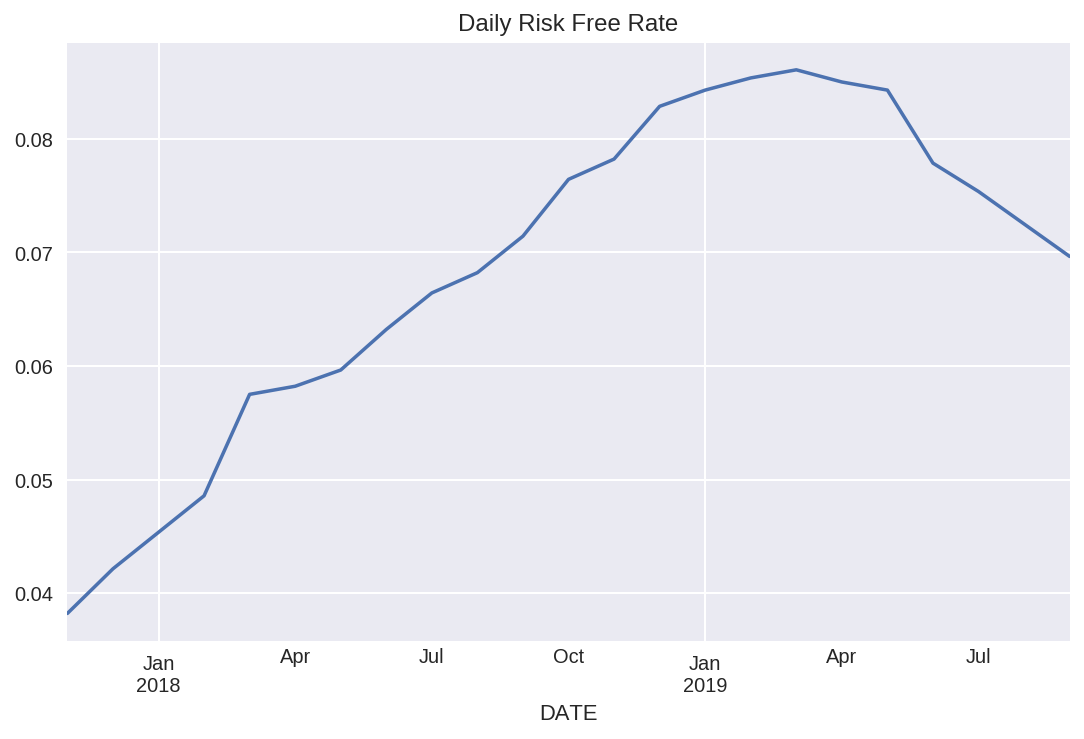

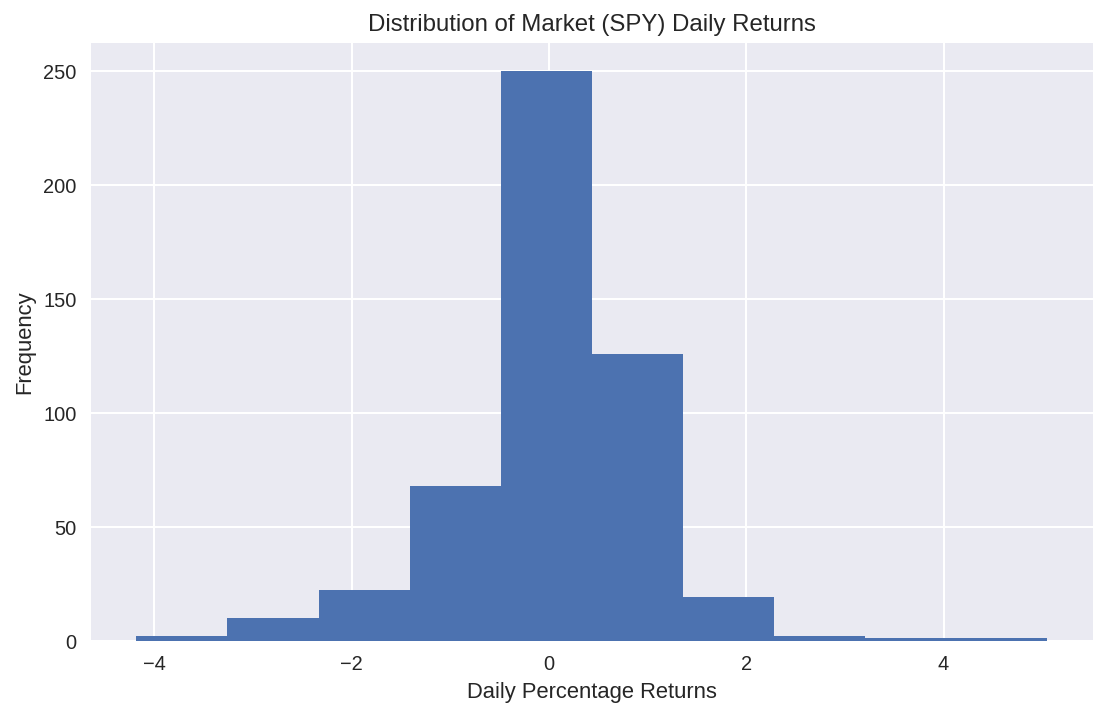

Descriptive Stastics of the Market's daily percentage returns:
count    501.000000
mean       0.041432
std        0.942654
min       -4.182255
25%       -0.322528
50%        0.054880
75%        0.551702
max        5.052487
Name: Adj Close, dtype: float64


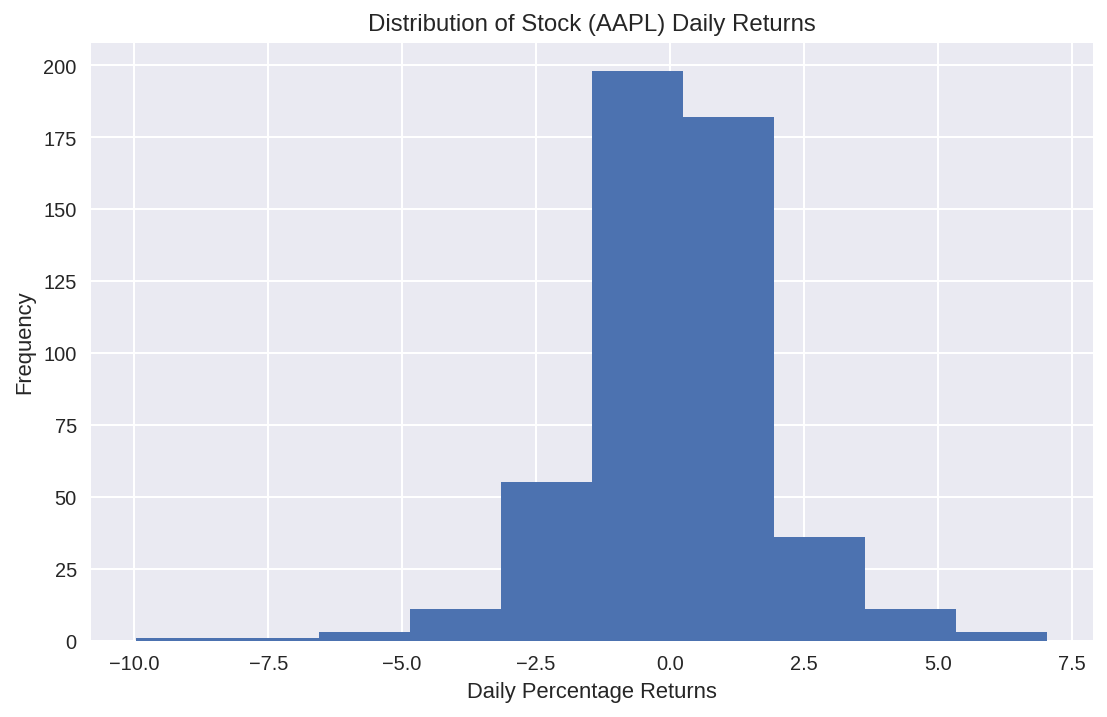

Descriptive stastics of Apple stock's percentage returns:
count    501.000000
mean       0.103936
std        1.739765
min       -9.960742
25%       -0.655618
50%        0.089324
75%        1.014499
max        7.042150
Name: Adj Close, dtype: float64


In [3]:

riskfree_rate = pdr.DataReader('TB4WK', 'fred', start, end)
riskfree_scaling = 28 #Need to scale the risk free rate by its maturity to get the daily risk free rate
riskfree_rate = riskfree_rate['TB4WK'].dropna()/riskfree_scaling
riskfree_rate.plot(), plt.title('Daily Risk Free Rate'), plt.show()


market_return = market['Adj Close'].pct_change(1)*100
market_return = market_return.dropna()
plt.hist(market_return), plt.title('Distribution of Market (SPY) Daily Returns'), plt.xlabel('Daily Percentage Returns'), plt.ylabel('Frequency'), plt.show()
print("Descriptive Stastics of the Market's daily percentage returns:\n{}".format(market_return.describe()))

stock_return = stock['Adj Close'].pct_change(1)*100
stock_return = stock_return.dropna()
plt.hist(stock_return), plt.title('Distribution of Stock (AAPL) Daily Returns'), plt.xlabel('Daily Percentage Returns'), plt.ylabel('Frequency'), plt.show()
print("Descriptive stastics of Apple stock's percentage returns:\n{}".format(stock_return.describe()))

# Build your linear regression model

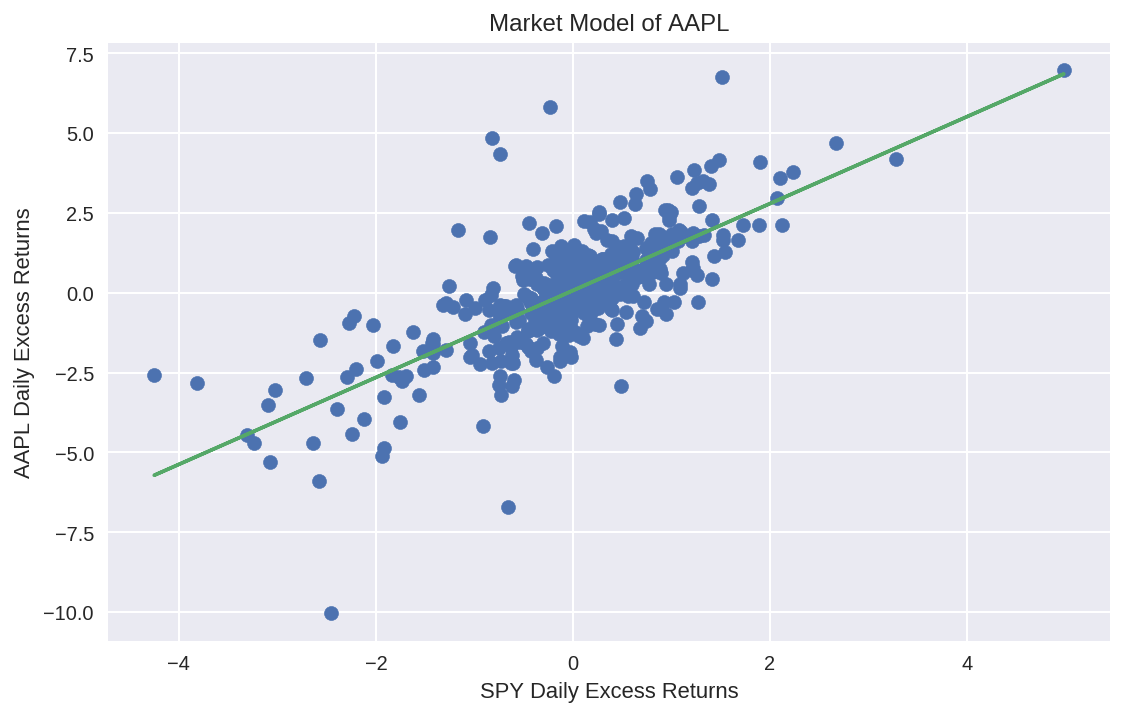

According to AAPL's Market Model, the security had a realized Alpha of 0.07% and Beta of 1.36%


In [4]:
#AAPL's Market Model
y = stock_return - riskfree_rate.mean()
x = market_return - riskfree_rate.mean()
plt.scatter(x,y)
x = sm.add_constant(x)
market_model = sm.OLS(y, x).fit()
plt.plot(x, x*market_model.params[1]+market_model.params[0])
plt.title('Market Model of AAPL'), plt.xlabel('SPY Daily Excess Returns'), plt.ylabel('AAPL Daily Excess Returns'), plt.show();
print("According to AAPL's Market Model, the security had a realized Alpha of {0}% and Beta of {1}%".format(round(market_model.params[0],2), round(market_model.params[1],2)))

# Analyze your results

In [6]:
print("The Market Model of AAPL is summarized below:\n{}".format(market_model.summary()));

The Market Model of AAPL is summarized below:
                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     595.5
Date:                Mon, 21 Oct 2019   Prob (F-statistic):           3.78e-87
Time:                        19:11:33   Log-Likelihood:                -791.07
No. Observations:                 501   AIC:                             1586.
Df Residuals:                     499   BIC:                             1595.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const 